# Sentiment Analysis of Consumer Reviews for FMCG Company Products:
## Text Analytics Project using Topic modeling, word clouds and sentiment score

### for ITC: Octane

## Import the Libraries

In [2]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the numpy library for numerical computations and array operations
import numpy as np
# Importing the matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importing the WordCloud class, STOPWORDS, ImageColorGenerator from the wordcloud module for generating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Importing the nltk library for natural language processing
import nltk
# Importing the re module for regular expression operations
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import libraries for topic modeling using LDA

In [3]:
import gensim
# Importing the corpora module from gensim for creating document-term matrices
from gensim import corpora
# for latent Dirichlet allocation (LDA) topic modeling
from gensim.models import LdaModel

## Import the Scraped Data


In [4]:
data = pd.read_csv('datasets/octane.csv')
data.head(10)

headline  \
0  This pen has waterproof ink 👍   
1                           Nice   
2                 Ya super sumth   
3                     Waterproof   
4                           Good   
5                   Nice product   
6                       nice one   
7                        Quality   
8                            YES   
9                           Nice   

                                              review              rating  
0  I love this product's quality! the body of the...  4.0 out of 5 stars  
1                          Handwriting is so perfect  4.0 out of 5 stars  
2                                   Yes all ways don  4.0 out of 5 stars  
3                                          Good pens  4.0 out of 5 stars  
4                                       Good quality  4.0 out of 5 stars  
5                                       Nice product  4.0 out of 5 stars  
6                        good one. my kids loved it.  5.0 out of 5 stars  
7                           Smooth and easy to write  5.0 out of 5 stars  
8                                               GOOD  5.0 out of 5 stars  
9                Was much appreciated by my students  4.0 out of 5 stars

In [5]:
data.isnull().sum()

headline     0
review      17
rating       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  711 non-null    object
 1   review    694 non-null    object
 2   rating    711 non-null    object
dtypes: object(3)
memory usage: 16.8+ KB


## Dropping rows which have null values

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 710
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  694 non-null    object
 1   review    694 non-null    object
 2   rating    694 non-null    object
dtypes: object(3)
memory usage: 21.7+ KB


## This method is for cleaning the data. That is stemming and removing stopwords 

In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

## Spiltting reviews to get keywords for our topic modeling

In [9]:
texts = data["review"]
split_text = [d.split() for d in texts]

In [10]:
dictionary = corpora.Dictionary(split_text)
# filter out words that occur in < 20 reviews, or > 80% of the reviews
dictionary.filter_extremes(no_below = 20, no_above = .8)

# creat corpus: pairing of word id and word frequency in each document

In [11]:
corpus = [dictionary.doc2bow(text) for text in split_text] 

In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10, passes = 40)

In [20]:
### Latent Dirichlet Allocation algorithm for topic modeling

In [21]:
topics = lda_model.print_topics(num_words = 10)
# for topic in topics:  
#     print(topic)

## List of latent (hidden) topics and their top 11 keywords

In [22]:
for i, topic in lda_model.show_topics(formatted=False, num_words= 11):
    print('Topic: {} \nWords: {}'.format(i, [w[0] for w in topic]), end = "\n"+"-"*120+"\n")

Topic: 0 
Words: ['good', 'product', 'quality', 'writing', 'nice', 'body', 'ink', 'pens', 'smooth', 'money', 'easy']
------------------------------------------------------------------------------------------------------------------------
Topic: 1 
Words: ['grip', 'quality', 'use', 'writing', 'ink', 'pen', 'write', 'pens', 'good', 'easy', 'neon']
------------------------------------------------------------------------------------------------------------------------
Topic: 2 
Words: ['pen', 'good', 'writing', 'smooth', 'grip', 'quality', 'pens', 'nice', 'write', 'best', 'gel']
------------------------------------------------------------------------------------------------------------------------
Topic: 3 
Words: ['write', 'like', 'easy', 'smooth', 'pen', 'good', 'pens', 'writing', 'product', 'gel', 'body']
------------------------------------------------------------------------------------------------------------------------
Topic: 4 
Words: ['pens', 'body', 'good', 'ink', 'blue', 'neon'

## Analysis of the ratings

In [23]:
data['rating'] = data['rating'].str.split().str[0].astype(float)

In [24]:
data.head()

headline  \
0  This pen has waterproof ink 👍   
1                           Nice   
2                 Ya super sumth   
3                     Waterproof   
4                           Good   

                                              review  rating  
0  love products quality body pen beautiful handw...     4.0  
1                                handwriting perfect     4.0  
2                                           yes ways     4.0  
3                                          good pens     4.0  
4                                       good quality     4.0

In [25]:
ratings = data["rating"].value_counts()
numbers = ratings.index
labels = []
for i in numbers:
    labels.append(str(int(i))+ " star rating")

In [26]:
quantity = ratings.values

figure = px.pie(data, 
             values=quantity, 
             names=labels,
             title='Customer ratings out of 5',
             hole= 0.4)
figure.show()

## Interpetation of the distribution:
The customer ratings data shows that the majority of customers were highly satisfied, with a significant number of five-star ratings. However, there were also a notable number of customers who expressed average or below-average satisfaction levels. This indicates room for improvement to address customer concerns and enhance overall satisfaction

## WordCloud for the Reviews

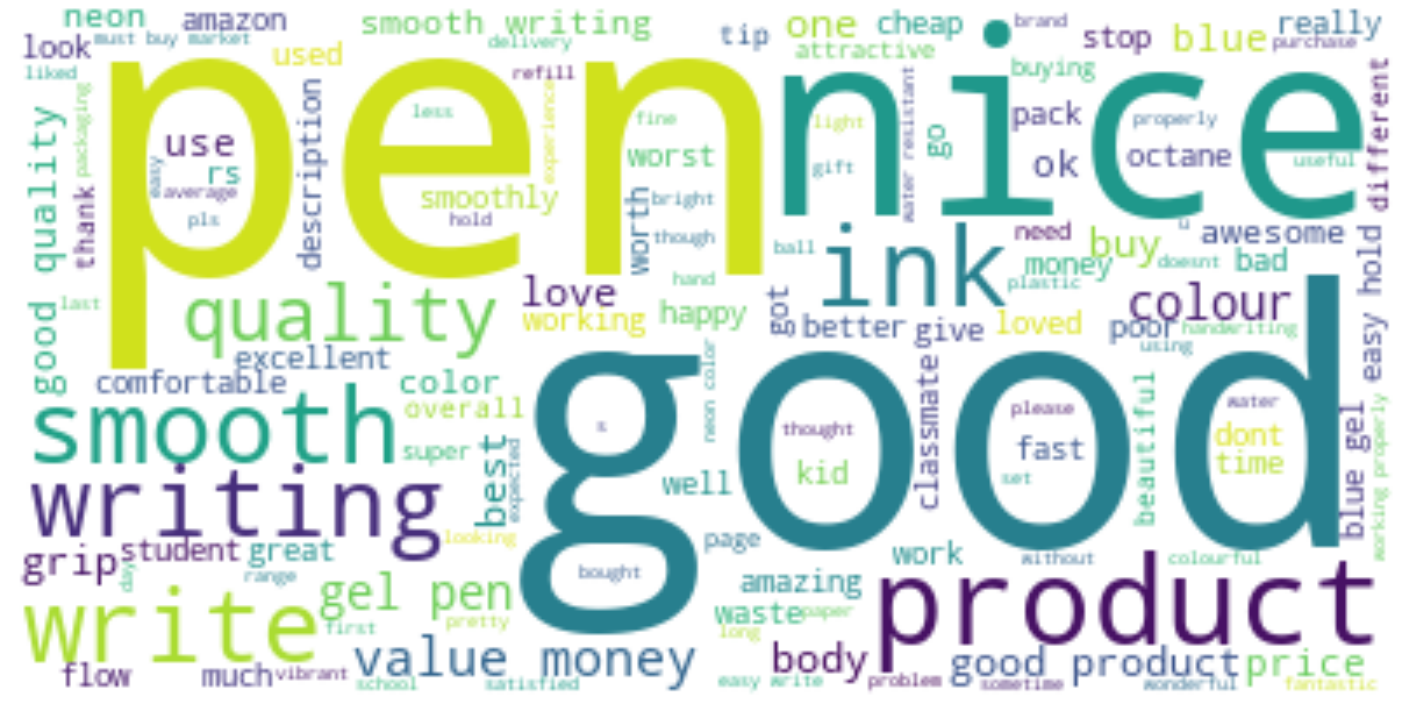

In [27]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## The above word cloud illustrates the keywords in the reviews
Note the presence of predominantly positive words

## Calculating the Sentiment Scores

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kvpai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
data.head()

review  Positive  Negative  \
0  love products quality body pen beautiful handw...     0.579       0.0   
1                                handwriting perfect     0.787       0.0   
2                                           yes ways     0.730       0.0   
3                                          good pens     0.744       0.0   
4                                       good quality     0.744       0.0   

   Neutral  
0    0.421  
1    0.213  
2    0.270  
3    0.256  
4    0.256

## Interpretation of the polarity scores:
The interpretation of the polarity/sentiment scores reveals the overall sentiment expressed in the customer reviews, ranging from positive to negative.

In [30]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Overall Positive")
    elif (b>a) and (b>c):
        print("Overall Negative")
    else:
        print("Overall Neutral")
sentiment_score(x, y, z)

Overall Positive


In [31]:
sentiment_percent = [['Positive', round(x/len(data)*100, 3)],
                     ['Negative', round(y/len(data)*100, 3)],
                     ['Neurtal', round(z/len(data)*100, 3)]]
sentiment_res = pd.DataFrame(sentiment_percent, columns=['Sentiment', 'Percentage'])
sentiment_res

Sentiment  Percentage
0  Positive      51.831
1  Negative       5.067
2   Neurtal      42.814

## Create a new dataframe
create a new dataframe with customers who had a bad experience with this product.

In [32]:
data_neg = data[(data['Negative']>data['Positive']) & (data['Negative']>data['Neutral'])]

In [33]:
data_neg.head(30)

review  Positive  Negative  \
76                                         doubt u buy     0.000     0.714   
154                  stopped writing days disappointed     0.000     0.714   
263        smooth first pen stops writing sometime bad     0.000     0.505   
290                                             costly     0.000     1.000   
314                                          poor grip     0.000     0.756   
344  mistake ordered  packets need  packets rectify...     0.000     0.505   
374                             smooth difficult write     0.000     0.556   
402  listing said  pens got  improper packaging ste...     0.197     0.427   
404                                                bad     0.000     1.000   
428                             worst pen ever written     0.000     0.577   
473                           plastic quality pen poor     0.000     0.508   
490                                      nothing great     0.000     0.767   
498                                            bad pen     0.000     0.778   
604   fake product pen like unpleasant write dont like     0.329     0.408   
605      poor quality got pain hands writing ergonomic     0.000     0.561   
610                                                bad     0.000     1.000   
611                            worst dont buy products     0.000     0.577   
619                                   waste money time     0.000     0.583   
620                        bad product dont waste time     0.264     0.396   
625              worst pen stops writing ink leaks tip     0.000     0.533   
626                                                bad     0.000     1.000   
629            didnt like far better options available     0.000     0.530   
631                                       poor quality     0.000     0.756   
633                                      worst product     0.000     0.804   
636                                misleading qty info     0.000     0.574   
638         worst experiencestops writingmay old stock     0.000     0.506   
642                                              worst     0.000     1.000   
675                                           bad pens     0.000     0.778   

     Neutral  
76     0.286  
154    0.286  
263    0.495  
290    0.000  
314    0.244  
344    0.495  
374    0.444  
402    0.377  
404    0.000  
428    0.423  
473    0.492  
490    0.233  
498    0.222  
604    0.263  
605    0.439  
610    0.000  
611    0.423  
619    0.417  
620    0.340  
625    0.467  
626    0.000  
629    0.470  
631    0.244  
633    0.196  
636    0.426  
638    0.494  
642    0.000  
675    0.222

create a new dataframe with customers who had a good experience with this product.

In [34]:
data_pos = data[(data['Positive']>data['Negative']) & (data['Positive']>data['Neutral'])]
data_pos.head()

review  Positive  Negative  \
0  love products quality body pen beautiful handw...     0.579       0.0   
1                                handwriting perfect     0.787       0.0   
2                                           yes ways     0.730       0.0   
3                                          good pens     0.744       0.0   
4                                       good quality     0.744       0.0   

   Neutral  
0    0.421  
1    0.213  
2    0.270  
3    0.256  
4    0.256

## Word Cloud: Negative Sentiments in Customer Reviews
This word cloud is created using words extracted from customer reviews with negative sentiment, providing a visual representation of the frequently occurring negative words and phrases. 

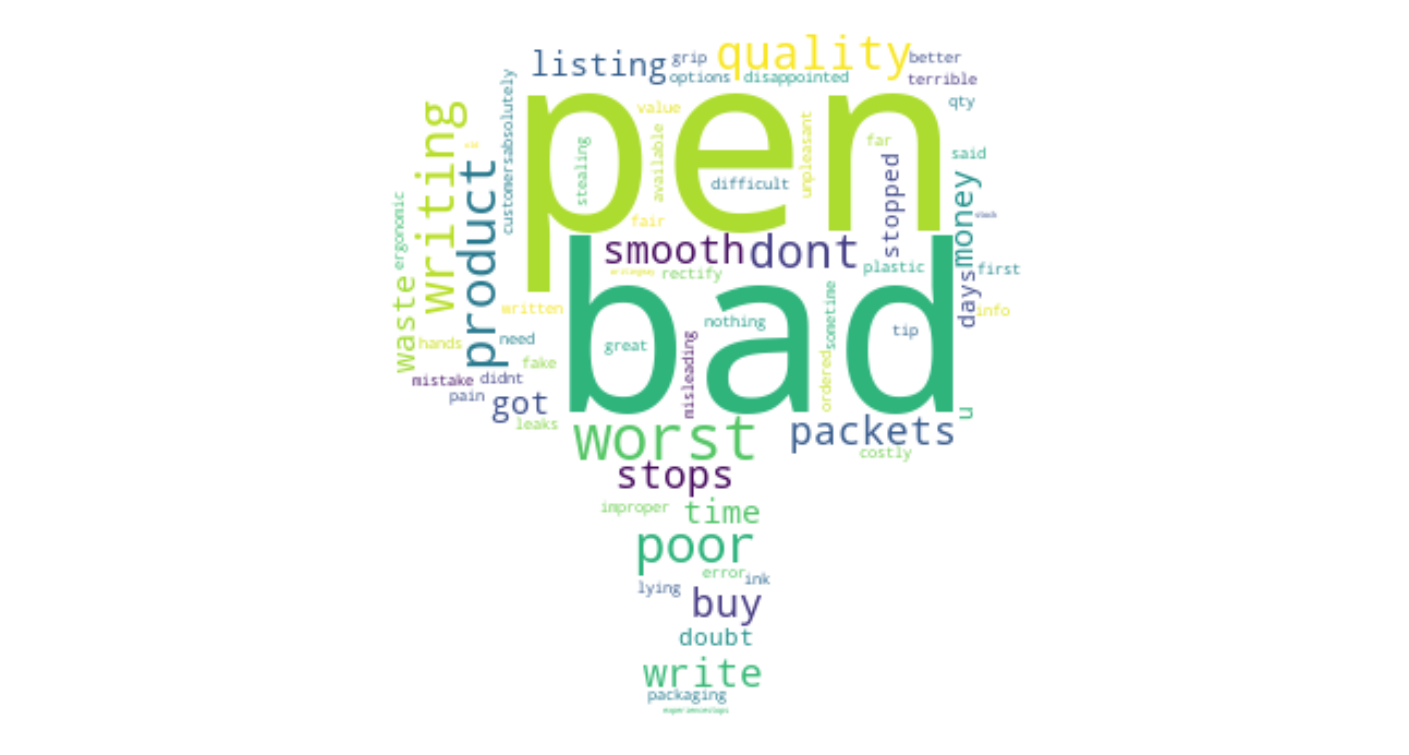

In [42]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
mask = np.array(Image.open("assets/thumbs-down.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words=250).generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud: Positive Sentiments in Customer Reviews
This word cloud is generated by extracting words from customer reviews with positive sentiment, offering a visual representation of the frequently occurring positive words and phrases.. 

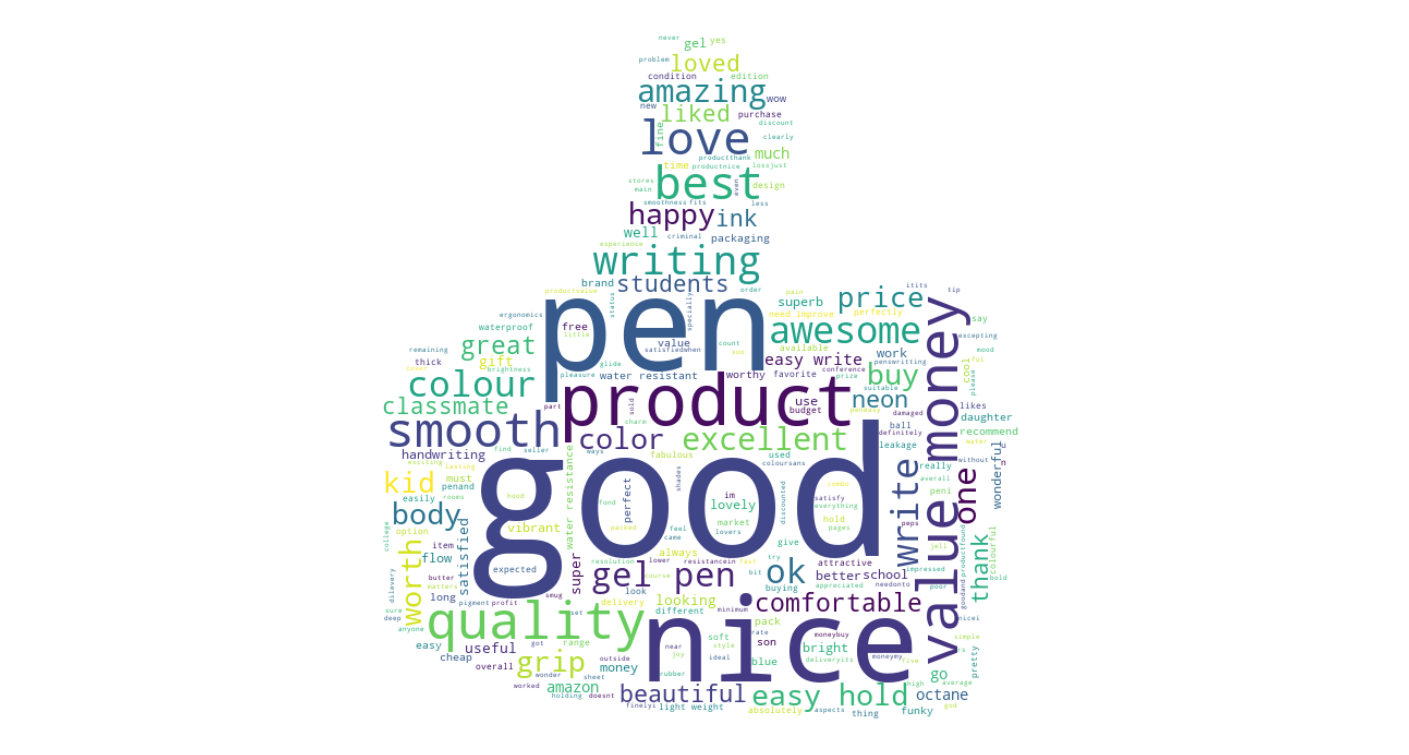

In [44]:
text = " ".join(i for i in data_pos.review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("assets/thumbs-up.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=250, mask=mask).generate(text)
plt.figure(figsize=(25,25))
# plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In conclusion, this Python notebook focused on analyzing customer ratings and sentiments. The data provided valuable insights into customer satisfaction levels, with a majority of customers giving positive ratings. The word cloud visualizations further highlighted the predominant positive or negative sentiments expressed in customer reviews. By understanding the sentiment polarity and analyzing the frequently occurring words, businesses can gain deeper insights into customer experiences and identify areas for improvement. This analysis serves as a valuable tool for enhancing customer satisfaction, making data-driven decisions, and refining products or services based on customer feedback.
